In [1]:
import torch
print(torch.cuda.is_available())

True


In [3]:
import pandas as pd

scp_statements_path = r".\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\scp_statements.csv"
scp_statements = pd.read_csv(scp_statements_path)

sinus_descriptions = ['sinus rhythm', 'normal ECG']
afib_descriptions = ['atrial fibrillation']
heart_block_descriptions = [
    'first degree AV block', 'second degree AV block', 
    'left bundle branch block', 'right bundle branch block', 'incomplete left bundle branch block', 
    'incomplete right bundle branch block', 'left anterior fascicular block', 'right posterior fascicular block'
]

filtered_by_sinus = scp_statements[scp_statements['description'].str.contains('|'.join(sinus_descriptions), case=False, na=False)]
filtered_by_sinus['group'] = 'Sinus'

filtered_by_afib = scp_statements[scp_statements['description'].str.contains('|'.join(afib_descriptions), case=False, na=False)]
filtered_by_afib['group'] = 'AFib'

#filtered_by_heart_block = scp_statements[scp_statements['description'].str.contains('|'.join(heart_block_descriptions), case=False, na=False)]
#filtered_by_heart_block['group'] = 'Heart Block'

combined_filtered_df = pd.concat([filtered_by_sinus, filtered_by_afib]).drop_duplicates()

print("Combined filtered DataFrame with appropriate groups:")
print(combined_filtered_df[['diagnostic_class', 'description', 'group', 'scp_code']])


Combined filtered DataFrame with appropriate groups:
   diagnostic_class          description  group scp_code
4              NORM           normal ECG  Sinus     NORM
59              NaN         sinus rhythm  Sinus       SR
60              NaN  atrial fibrillation   AFib     AFIB


C:\Users\Vinh\AppData\Local\Temp\ipykernel_42612\3891620235.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_sinus['group'] = 'Sinus'
C:\Users\Vinh\AppData\Local\Temp\ipykernel_42612\3891620235.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_afib['group'] = 'AFib'


In [4]:
import pandas as pd

valid_scp_codes = combined_filtered_df['scp_code'].dropna().unique()
valid_scp_codes

array(['NORM', 'SR', 'AFIB'], dtype=object)

In [5]:
import ast

ptbxl_df = pd.read_csv('.\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptbxl_database.csv')

def get_highest_scp_code(scp_dict):
    scp_dict = ast.literal_eval(scp_dict)
    return max(scp_dict, key=scp_dict.get)

ptbxl_df['highest_scp_code'] = ptbxl_df['scp_codes'].apply(get_highest_scp_code)
ptbxl_df.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code
0,1,15709,56,1,NaN,63.0,2.0,0.0,CS-12 E,11/9/1984 9:17,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,NORM
1,2,13243,19,0,NaN,70.0,2.0,0.0,CS-12 E,11/14/1984 12:55,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,NORM
2,3,20372,37,1,NaN,69.0,2.0,0.0,CS-12 E,11/15/1984 12:49,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,NORM
3,4,17014,24,0,NaN,82.0,2.0,0.0,CS-12 E,11/15/1984 13:44,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,NORM
4,5,17448,19,1,NaN,70.0,2.0,0.0,CS-12 E,11/17/1984 10:43,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,NORM


In [6]:
filtered_ptbxl_df = ptbxl_df[ptbxl_df['highest_scp_code'].isin(valid_scp_codes)]
filtered_ptbxl_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code
0,1,15709,56,1,NaN,63.0,2.0,0.0,CS-12 E,11/9/1984 9:17,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,NORM
1,2,13243,19,0,NaN,70.0,2.0,0.0,CS-12 E,11/14/1984 12:55,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,NORM
2,3,20372,37,1,NaN,69.0,2.0,0.0,CS-12 E,11/15/1984 12:49,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,NORM
3,4,17014,24,0,NaN,82.0,2.0,0.0,CS-12 E,11/15/1984 13:44,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,NORM
4,5,17448,19,1,NaN,70.0,2.0,0.0,CS-12 E,11/17/1984 10:43,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,NORM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21791,21830,10520,86,0,NaN,NaN,1.0,2.0,AT-60 3,5/28/2001 7:53,...,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/21000/21830_lr,records500/21000/21830_hr,NORM
21792,21831,11905,55,1,NaN,NaN,1.0,2.0,AT-60 3,5/28/2001 12:49,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/21000/21831_lr,records500/21000/21831_hr,NORM
21795,21834,20703,300,0,NaN,NaN,1.0,2.0,AT-60 3,6/5/2001 11:33,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,NORM
21797,21836,8873,64,1,NaN,NaN,1.0,2.0,AT-60 3,6/9/2001 18:21,...,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,NORM


In [6]:
import os
import wfdb
import re

mit_bih_dir = "C:\Vinh\CSSALT\CSSALT-waveform-classify-model\mit-bih-malignant-ventricular-ectopy-database-1.0.0\mit-bih-malignant-ventricular-ectopy-database-1.0.0"

records = sorted(set(f.split('.')[0] for f in os.listdir(mit_bih_dir) if f.endswith('.atr')))

data = []
for record in records:
    record_path = os.path.join(record) 

    annotation = wfdb.rdann(os.path.join(mit_bih_dir, record), 'atr')
    label = annotation.aux_note[0] if annotation.aux_note else "UNKNOWN"  # Get the first label or use default
    
    label = re.sub(r'[()]', '', label)
    
    data.append({'Record': record_path, 'Label': label})

df = pd.DataFrame(data)
df

,Record,Label
0,418,N 
1,419,N 
2,420,N 
3,421,N 
4,422,N 
5,423,N 
6,424,N 
7,425,N 
8,426,N 
9,427,N 


In [26]:
from jupyter_server import serverapp
serverapp.ServerApp.iopub_data_rate_limit = 10000000  

In [30]:
import wfdb

record_path = 'C:\Vinh\CSSALT\CSSALT-waveform-classify-model\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/06000/06842_lr'  # Adjust path as necessary

try:
    record = wfdb.rdrecord(record_path)
    print(record.p_signal)  
    print(record.__dict__)  
except Exception as e:
    print(f"Error loading record: {e}")


[[ 0.018 -0.001 -0.019 ...  0.03  -0.015  0.   ]
 [ 0.014 -0.006 -0.02  ...  0.03  -0.016 -0.003]
 [ 0.022  0.002 -0.02  ...  0.027 -0.02  -0.009]
 ...
 [-0.035  0.038  0.073 ...  0.066 -0.013 -0.071]
 [-0.044  0.024  0.067 ...  0.082 -0.066 -0.082]
 [-0.058  0.016  0.074 ...  0.097 -0.246 -0.031]]
{'record_name': '06842_lr', 'n_sig': 12, 'fs': 100, 'counter_freq': None, 'base_counter': None, 'sig_len': 1000, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': array([[ 0.018, -0.001, -0.019, ...,  0.03 , -0.015,  0.   ],
       [ 0.014, -0.006, -0.02 , ...,  0.03 , -0.016, -0.003],
       [ 0.022,  0.002, -0.02 , ...,  0.027, -0.02 , -0.009],
       ...,
       [-0.035,  0.038,  0.073, ...,  0.066, -0.013, -0.071],
       [-0.044,  0.024,  0.067, ...,  0.082, -0.066, -0.082],
       [-0.058,  0.016,  0.074, ...,  0.097, -0.246, -0.031]]), 'd_signal': None, 'e_p_signal': None, 'e_d_sig

In [7]:
group_mapping = {
    'AFIB': 'AFib-related',
    #'AFLT': 'AFib-related',
    #'1AVB': 'Block-related',
    #'2AVB': 'Block-related',
    #'3AVB': 'Block-related',
    #'CLBBB': 'Block-related',
    #'CRBBB': 'Block-related',
    #'ILBBB': 'Block-related',
    #'IRBBB': 'Block-related',
    #'LAFB': 'Block-related',
    'NORM': 'Normal',
    #'PACE': 'Normal',
    'SR': 'Normal'
}

filtered_ptbxl_df['Group'] = filtered_ptbxl_df['highest_scp_code'].map(group_mapping)

filtered_ptbxl_df[['highest_scp_code', 'Group']]


C:\Users\Vinh\AppData\Local\Temp\ipykernel_42612\1455779425.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ptbxl_df['Group'] = filtered_ptbxl_df['highest_scp_code'].map(group_mapping)


,highest_scp_code,Group
0,NORM,Normal
1,NORM,Normal
2,NORM,Normal
3,NORM,Normal
4,NORM,Normal
...,...,...
21791,NORM,Normal
21792,NORM,Normal
21795,NORM,Normal
21797,NORM,Normal


In [8]:
group_counts = filtered_ptbxl_df['Group'].value_counts()
group_counts

Group
Normal          9139
AFib-related      45
Name: count, dtype: int64

In [9]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd

augmentation_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  
    transforms.RandomResizedCrop((100, 250), scale=(0.95, 1.05)),
    transforms.RandomInvert(p=0.5),
    transforms.ToTensor(),  
])

afib_related_df = filtered_ptbxl_df[filtered_ptbxl_df['Group'] == 'AFib-related']

augmented_images = []
augmented_labels = []

root_path = r"C:\Vinh\CSSALT\CSSALT-waveform-classify-model\ecg_images"

def resize_image(img, size=(100, 250)):
    return img.resize(size)

for idx, row in afib_related_df.iterrows():
    ecg_id_padded = str(row['ecg_id']).zfill(5) + "_lr"
    image_path = os.path.join(root_path, f"{ecg_id_padded}.png")
    label = row['Group']

    if os.path.exists(image_path):
        img = Image.open(image_path).convert("RGB")
    else:
        print(f"Warning: Image file not found at {image_path}")
        continue  

    img_resized = resize_image(img)

    for _ in range(40):  
        augmented_img = augmentation_transforms(img_resized)
        augmented_images.append(augmented_img)
        augmented_labels.append(label)

augmented_dataset = list(zip(augmented_images, augmented_labels))

In [10]:
import torchvision.transforms as T
from sklearn.utils import resample 

resize_transform = T.Resize((100, 250)) 

def load_image_as_tensor(image_path):
    if os.path.exists(image_path):
        img = Image.open(image_path).convert("RGB")
        img_resized = resize_transform(img)  
        return T.ToTensor()(img_resized)
    else:
        print(f"Warning: Image file not found at {image_path}")
        return None

normal_df = filtered_ptbxl_df[filtered_ptbxl_df['Group'] == 'Normal']
#block_related_df = filtered_ptbxl_df[filtered_ptbxl_df['Group'] == 'Block-related']

normal_downsampled = resample(normal_df, replace=False, n_samples=2000, random_state=42)
#block_downsampled = resample(block_related_df, replace=False, n_samples=2000, random_state=42)

normal_images = []
normal_labels = []
#block_images = []
#block_labels = []

for idx, row in normal_downsampled.iterrows():
    ecg_id_padded = str(row['ecg_id']).zfill(5) + "_lr"
    image_path = os.path.join(root_path, f"{ecg_id_padded}.png")
    label = row['Group']

    tensor_image = load_image_as_tensor(image_path)
    if tensor_image is not None:
        normal_images.append(tensor_image)
        normal_labels.append(label)

'''for idx, row in block_downsampled.iterrows():
    ecg_id_padded = str(row['ecg_id']).zfill(5) + "_lr"
    image_path = os.path.join(root_path, f"{ecg_id_padded}.png")
    label = row['Group']

    tensor_image = load_image_as_tensor(image_path)
    if tensor_image is not None:
        block_images.append(tensor_image)
        block_labels.append(label)'''
normal_downsampled['image'] = normal_images
#block_downsampled['image'] = block_images

In [11]:
augmented_df = pd.DataFrame({
    'image': augmented_images,  
    'Group': augmented_labels   
})

balanced_df = pd.concat([normal_downsampled, augmented_df])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code,Group,image
0,6485.0,4338.0,36.0,0.0,179.0,73.0,10.0,1.0,AT-6 C 5.5,7/15/1991 12:45,...,NaN,NaN,NaN,NaN,4.0,records100/06000/06485_lr,records500/06000/06485_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
1,16607.0,12991.0,74.0,0.0,NaN,NaN,0.0,0.0,CS100 3,8/6/1996 12:15,...,NaN,NaN,NaN,NaN,5.0,records100/16000/16607_lr,records500/16000/16607_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
2,13027.0,18372.0,58.0,0.0,NaN,83.0,0.0,0.0,CS-12 E,9/23/1994 8:16,...,NaN,NaN,NaN,NaN,1.0,records100/13000/13027_lr,records500/13000/13027_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.9961), tensor(0.9961), tensor(0.99..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,10039.0,21412.0,48.0,0.0,NaN,65.0,0.0,0.0,CS-12 E,4/18/1993 5:58,...,NaN,NaN,NaN,NaN,9.0,records100/10000/10039_lr,records500/10000/10039_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
3796,15056.0,1498.0,42.0,0.0,183.0,67.0,10.0,1.0,AT-6 C 5.5,9/24/1995 12:46,...,NaN,NaN,NaN,NaN,2.0,records100/15000/15056_lr,records500/15000/15056_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
3797,13865.0,16821.0,52.0,0.0,179.0,78.0,NaN,3.0,CS-12 E,3/6/1995 15:53,...,NaN,NaN,NaN,NaN,3.0,records100/13000/13865_lr,records500/13000/13865_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.9569), tensor(0.9569), tensor(0.95..."


In [12]:
group_sizes = balanced_df.groupby('Group').size()
group_sizes

Group
AFib-related    1800
Normal          2000
dtype: int64

In [13]:
group_to_label = {
    "Normal": 0,
    "AFib-related": 1,
    #"Block-related": 1
}

balanced_df["label"] = balanced_df["Group"].map(group_to_label)
balanced_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code,Group,image,label
0,6485.0,4338.0,36.0,0.0,179.0,73.0,10.0,1.0,AT-6 C 5.5,7/15/1991 12:45,...,NaN,NaN,NaN,4.0,records100/06000/06485_lr,records500/06000/06485_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
1,16607.0,12991.0,74.0,0.0,NaN,NaN,0.0,0.0,CS100 3,8/6/1996 12:15,...,NaN,NaN,NaN,5.0,records100/16000/16607_lr,records500/16000/16607_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
2,13027.0,18372.0,58.0,0.0,NaN,83.0,0.0,0.0,CS-12 E,9/23/1994 8:16,...,NaN,NaN,NaN,1.0,records100/13000/13027_lr,records500/13000/13027_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.9961), tensor(0.9961), tensor(0.99...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,10039.0,21412.0,48.0,0.0,NaN,65.0,0.0,0.0,CS-12 E,4/18/1993 5:58,...,NaN,NaN,NaN,9.0,records100/10000/10039_lr,records500/10000/10039_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
3796,15056.0,1498.0,42.0,0.0,183.0,67.0,10.0,1.0,AT-6 C 5.5,9/24/1995 12:46,...,NaN,NaN,NaN,2.0,records100/15000/15056_lr,records500/15000/15056_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
3797,13865.0,16821.0,52.0,0.0,179.0,78.0,NaN,3.0,CS-12 E,3/6/1995 15:53,...,NaN,NaN,NaN,3.0,records100/13000/13865_lr,records500/13000/13865_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.9569), tensor(0.9569), tensor(0.95...",1


In [14]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(
    balanced_df,
    test_size=0.15,  # 15% for testing
    stratify=balanced_df['label'],
    random_state=42
)

train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.15 / (1 - 0.15),  # remaining 85%
    stratify=train_val_df['label'],
    random_state=42
)

print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")

print("\nTraining set distribution:")
print(train_df['Group'].value_counts())

print("\nValidation set distribution:")
print(val_df['Group'].value_counts())

print("\nTesting set distribution:")
print(test_df['Group'].value_counts())

Training set: 2660 samples
Validation set: 570 samples
Testing set: 570 samples

Training set distribution:
Group
Normal          1400
AFib-related    1260
Name: count, dtype: int64

Validation set distribution:
Group
Normal          300
AFib-related    270
Name: count, dtype: int64

Testing set distribution:
Group
Normal          300
AFib-related    270
Name: count, dtype: int64


In [15]:
train_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code,Group,image,label
2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.9882), tensor(0.9882), tensor(0.98...",1
3777,9636.0,8995.0,21.0,0.0,NaN,86.0,2.0,0.0,CS-12 E,1/14/1993 10:26,...,NaN,NaN,NaN,5.0,records100/09000/09636_lr,records500/09000/09636_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
1096,2848.0,16463.0,44.0,0.0,NaN,87.0,0.0,0.0,CS-12 E,5/8/1989 10:09,...,NaN,NaN,NaN,10.0,records100/02000/02848_lr,records500/02000/02848_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
1116,18168.0,2952.0,35.0,0.0,165.0,85.0,1.0,1.0,AT-6 C 5.5,7/19/1997 10:27,...,NaN,NaN,NaN,8.0,records100/18000/18168_lr,records500/18000/18168_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
2625,9043.0,21546.0,78.0,1.0,NaN,NaN,1.0,2.0,CS-12,9/21/1992 18:20,...,NaN,NaN,NaN,9.0,records100/09000/09043_lr,records500/09000/09043_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,7236.0,10167.0,53.0,0.0,NaN,NaN,0.0,0.0,CS100 3,10/31/1991 18:17,...,NaN,NaN,NaN,1.0,records100/07000/07236_lr,records500/07000/07236_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
597,9831.0,3645.0,75.0,1.0,160.0,58.0,7.0,1.0,AT-6 C 5.5,2/23/1993 18:30,...,NaN,NaN,NaN,6.0,records100/09000/09831_lr,records500/09000/09831_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
2058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",1
820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.0431), tensor(0.0431), tensor(0.04...",1


In [16]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class ECGDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image = row['image']
        
        label = row['label'] 

        if self.transform:
            image = self.transform(image)
    
        return image, label

class ResizeFixedSize:
    def __init__(self, size):
        self.size = size

    def __call__(self, img):
        return torch.nn.functional.interpolate(img.unsqueeze(0), size=self.size).squeeze(0)

train_transform = transforms.Compose([
    ResizeFixedSize((100, 250)),  
    transforms.RandomResizedCrop((100, 250), scale=(0.95, 1.05)), 
    transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2)], p=0.5),
    #transforms.RandomApply([transforms.GaussianBlur(kernel_size=(3, 3))], p=0.1),
    transforms.RandomInvert(p=0.5),
    #transforms.RandomErasing(p=0.3, scale=(0.02, 0.1)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    ResizeFixedSize((100, 250)),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = ECGDataset(train_df, transform=train_transform)
val_dataset = ECGDataset(val_df, transform=val_test_transform)
test_dataset = ECGDataset(test_df, transform=val_test_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


In [17]:
train_size = len(train_dataset) 
val_size = len(val_dataset)     
test_size = len(test_dataset) 

train_batches = len(train_loader)
val_batches = len(val_loader)     
test_batches = len(test_loader)   

print(f"Training set size: {train_size} samples, {train_batches} batches")
print(f"Validation set size: {val_size} samples, {val_batches} batches")
print(f"Test set size: {test_size} samples, {test_batches} batches")

Training set size: 2660 samples, 84 batches
Validation set size: 570 samples, 18 batches
Test set size: 570 samples, 18 batches


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2365508..2.64].


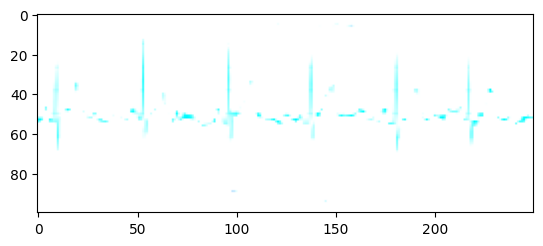

In [18]:
import matplotlib.pyplot as plt

for images, _ in train_loader:
    img = images[0].permute(1, 2, 0).numpy()  
    plt.imshow(img)
    plt.show()
    break

In [19]:
import torch
import torch.nn as nn
from torchvision import models

class EfficientNetB7TransferLearning(nn.Module):
    def __init__(self, num_classes=2):
        super(EfficientNetB7TransferLearning, self).__init__()

        self.efficientnet_b7 = models.efficientnet_b7(weights=models.EfficientNet_B7_Weights.IMAGENET1K_V1)

        for param in self.efficientnet_b7.parameters():
            param.requires_grad = False

        for param in self.efficientnet_b7.features[-2:].parameters():  
            param.requires_grad = True

        self.efficientnet_b7.classifier[1] = nn.Linear(self.efficientnet_b7.classifier[1].in_features, num_classes)
        
    def forward(self, x):
        return self.efficientnet_b7(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = EfficientNetB7TransferLearning(num_classes=2).to(device)

from torchsummary import summary
summary(model, input_size=(3, 100, 250))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 64, 50, 125]           1,728
       BatchNorm2d-2          [-1, 64, 50, 125]             128
              SiLU-3          [-1, 64, 50, 125]               0
            Conv2d-4          [-1, 64, 50, 125]             576
       BatchNorm2d-5          [-1, 64, 50, 125]             128
              SiLU-6          [-1, 64, 50, 125]               0
 AdaptiveAvgPool2d-7             [-1, 64, 1, 1]               0
            Conv2d-8             [-1, 16, 1, 1]           1,040
              SiLU-9             [-1, 16, 1, 1]               0
           Conv2d-10             [-1, 64, 1, 1]           1,088
          Sigmoid-11             [-1, 64, 1, 1]               0
SqueezeExcitation-12          [-1, 64, 50, 125]               0
           Conv2d-13          [-1, 32, 50, 125]           2,048
      BatchNorm2d-14          [-1, 32, 

In [ ]:
import torch
import torch.optim as optim
from sklearn.metrics import accuracy_score

criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

num_epochs = 20  

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    model.eval()  
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad(): 
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total

    scheduler.step(val_loss)

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

model.eval()  
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader)
test_accuracy = 100 * test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/20], Loss: 0.0224, Accuracy: 99.32%
Validation Loss: 0.0036, Validation Accuracy: 100.00%
Epoch [2/20], Loss: 0.0067, Accuracy: 99.92%
Validation Loss: 0.0000, Validation Accuracy: 100.00%
Epoch [3/20], Loss: 0.0018, Accuracy: 99.92%
Validation Loss: 0.0000, Validation Accuracy: 100.00%


In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, dataloader, device, class_names):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    report = classification_report(y_true, y_pred, target_names=class_names)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    return report, cm


Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.16      0.25       300
       Block       0.51      0.87      0.64       300

    accuracy                           0.52       600
   macro avg       0.54      0.52      0.45       600
weighted avg       0.54      0.52      0.45       600



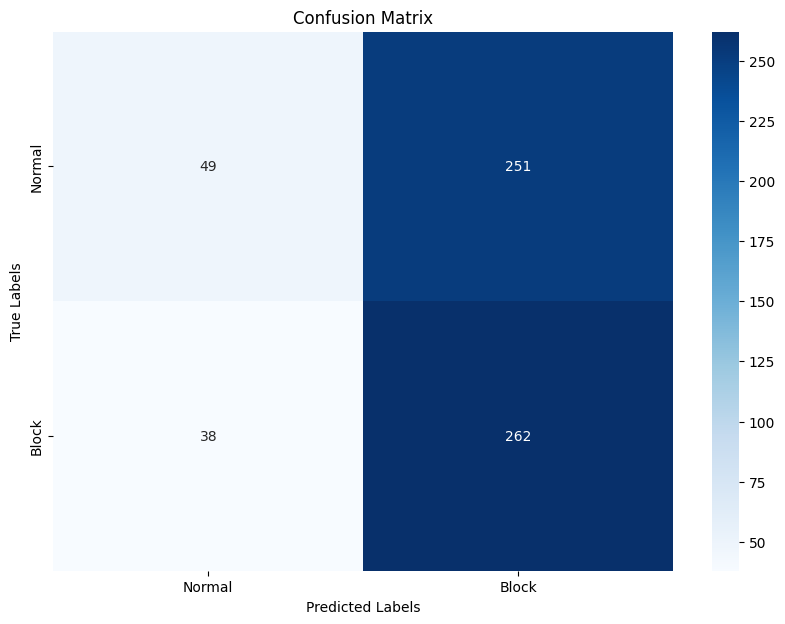

              precision    recall  f1-score   support

      Normal       0.56      0.16      0.25       300
       Block       0.51      0.87      0.64       300

    accuracy                           0.52       600
   macro avg       0.54      0.52      0.45       600
weighted avg       0.54      0.52      0.45       600



array([[ 49, 251],
       [ 38, 262]], dtype=int64)

In [21]:
class_names = ["Normal", "Block"]

report, cm = evaluate_model(model, val_loader, device, class_names)
print(report)
cm